In [86]:
import matplotlib.pyplot as plt 
import pandas as pd
from pathlib import Path
import numpy as np
import random 
import os 

In [80]:
path = Path().absolute() # gemini helped since i have never really used pathlib before, self explanatory tho
original_data_path = path/"original_data"
train_data_path = original_data_path/"train"/"train"
test_data_path = original_data_path/"test"
train_data_path

WindowsPath('c:/Users/Noah7/code/Github/AI-Noah-Eliasson-OPA23/lab2/original_data/train/train')

In [82]:
train_image_list = list(train_data_path.iterdir())
images = random.sample(train_image_list, 10)  # i have create a list of all the paths and this now randomly samples 10 paths from that list and stores it in images


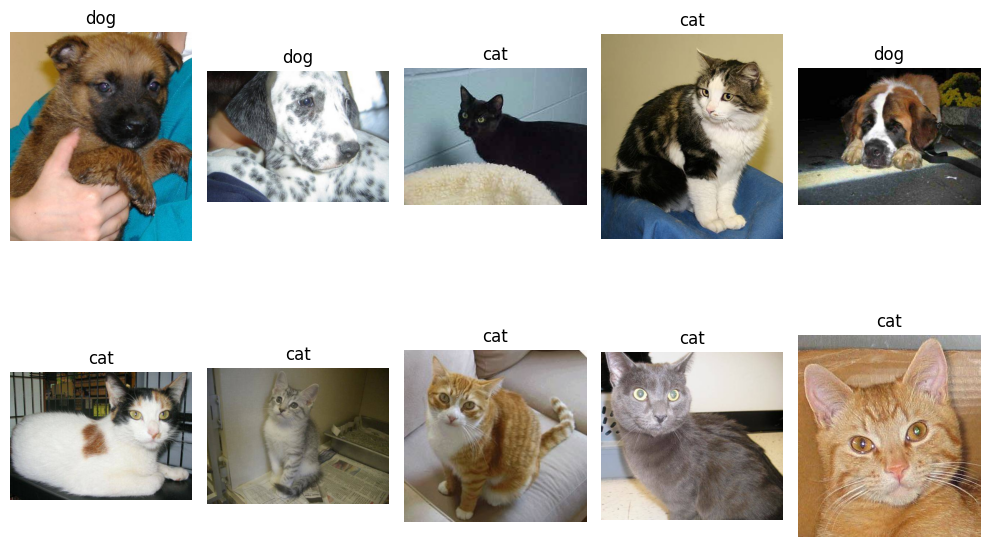

In [89]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))       
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(train_data_path, images[i])
    image = plt.imread(image_path)       
    ax.imshow(image)                    
    filename = os.path.basename(image_path)  # Get filename from path
    ax.set_title(filename[:3])
    ax.axis("off")

fig.tight_layout()  